# LEVEL 3

In [1]:
#    IMPORTING NECCESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter

# LOADING THE DATASET
df = pd.read_csv('cognify.csv')

#DISPLAYING ALL THE COLUMNS 
pd.set_option('display.max_columns', None)

#SHOW THE DATASET
df


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [2]:
# CHECKING DATASET INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
# CHECKING FOR MISSING VALUES IN THE DATASET
df.isna().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
# HANDLE MISSING VALUES
df.dropna(subset=['Cuisines'], inplace=True)
# CHECKING FOR THE HANDLED MISSING VAULES
df.isna().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Task 1: Restaurant Reviews


# 1a). Analyze the text reviews to identify the most common positive and negative keywords.¶

In [5]:

# Analyze reviews using 'rating text' column as reviews
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize and clean reviews
def tokenize_reviews(texts):
    words = ' '.join(texts).lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Find common keywords for positive and negative reviews
positive_words = tokenize_reviews(df[df['Aggregate rating'] >= 4]['Rating text'])
negative_words = tokenize_reviews(df[df['Aggregate rating'] < 3]['Rating text'])

# Count keywords
pos_counts = Counter(positive_words).most_common(10)
neg_counts = Counter(negative_words).most_common(10)

#Print Results

print("Most Common Positive Keywords:", pos_counts)
print("Most Common Negative Keywords:", neg_counts)






Most Common Positive Keywords: [('good', 1078), ('excellent', 300)]
Most Common Negative Keywords: [('rated', 2148), ('average', 1247), ('poor', 186)]


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


# 1b). Calculate the average length of reviews and explore if there is a relationship between review length and rating.


Average Length Review: 1.34 words
Correlation between Review Length and Rating: -0.60


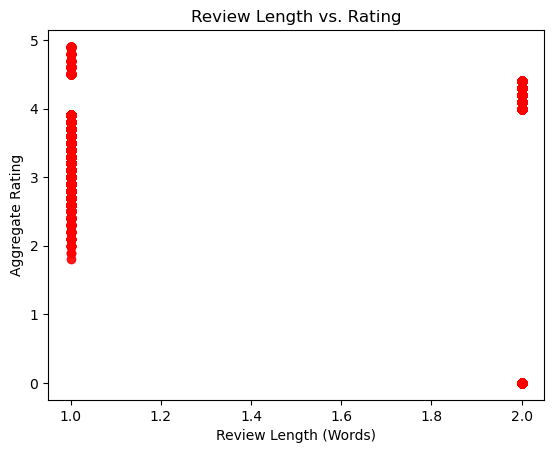

In [6]:

# Create a new column for review length (counting the number of words in "Rating text")
df["Review Length"] = df["Rating text"].apply(lambda x: len(str(x).split()))

# Calculate the average review length
average_review_length = df["Review Length"].mean()
print(f"Average Length Review: {average_review_length:.2f} words")

# Correlation between review length and rating
correlation = np.corrcoef(df["Review Length"], df["Aggregate rating"])[0, 1]
print(f"Correlation between Review Length and Rating: {correlation:.2f}")

# Scatter plot
plt.scatter(df['Review Length'], df['Aggregate rating'], alpha=0.9, color='red')
plt.xlabel("Review Length (Words)")
plt.ylabel("Aggregate Rating")
plt.title("Review Length vs. Rating")
plt.show()


# Task 2: Votes Analysis

# 2a).  Identify the restaurants with the highest and lowest number of votes.



In [7]:

# Identify the restaurant with the highest number of votes
highest_votes_restaurant = df.loc[df["Votes"].idxmax(), ["Restaurant Name", "Votes"]]

# Identify the restaurant with the lowest number of votes
lowest_votes_restaurant = df.loc[df["Votes"].idxmin(), ["Restaurant Name", "Votes"]]

# Print results
print(f"Restaurant with Highest Votes: {highest_votes_restaurant['Restaurant Name']} ({highest_votes_restaurant['Votes']} votes)")
print(f"Restaurant with Lowest Votes: {lowest_votes_restaurant['Restaurant Name']} ({lowest_votes_restaurant['Votes']} votes)")


Restaurant with Highest Votes: Toit (10934 votes)
Restaurant with Lowest Votes: Cantinho da Gula (0 votes)


In [8]:
# Identify the restaurant with the highest number of votes
#highest_votes_restaurant = df.loc[df["Restaurant Name", "Votes"]]

# Identify the restaurant with the lowest number of votes
lowest_votes_restaurant = df[["Restaurant Name", "Votes"]]

#highest_votes_restaurant
lowest_votes_restaurant.head(720)

,Restaurant Name,Votes
0,Le Petit Souffle,314
1,Izakaya Kikufuji,591
2,Heat - Edsa Shangri-La,270
3,Ooma,365
4,Sambo Kojin,229
...,...,...
724,Kailash Restaurant,76
725,Yalla Yalla,71
726,Sultans of Spice,2416
727,The Fatty Bao - Asian Gastro Bar,2369


# 2b).  Analyze if there is a correlation between the number of votes and the rating of a restaurant.

Correlation between Votes and Rating: 0.31


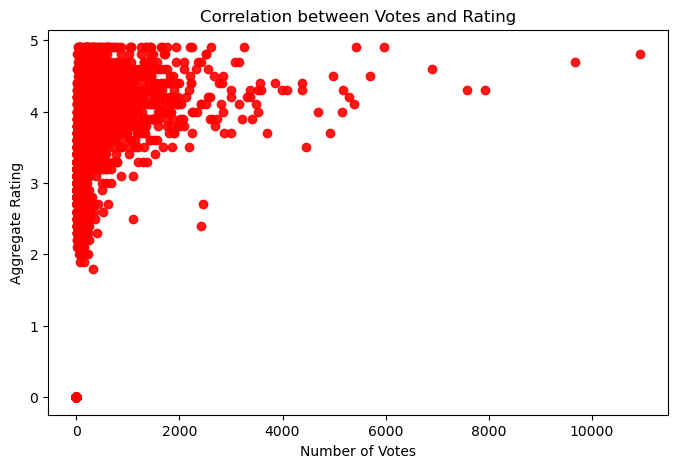

In [9]:

# Calculate correlation between "Votes" and "Aggregate rating"
correlation_votes_rating = np.corrcoef(df["Votes"], df["Aggregate rating"])[0, 1]

# Print the correlation result
print(f"Correlation between Votes and Rating: {correlation_votes_rating:.2f}")


# Scatter plot of Votes vs. Aggregate Rating
plt.figure(figsize=(8, 5))
plt.scatter(df["Votes"], df["Aggregate rating"], alpha=0.9, color="red")

# Labels and title
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Correlation between Votes and Rating")

# Show plot
plt.show()



# Task 3: Price Range vs. Online Delivery and Table Booking

# 3a).   Analyze if there is a relationship between the price range and the availability of online delivery and table booking.



Online Delivery Percentage
Price range
1    15.795403
2    41.310633
3    29.252669
4     9.044369
Name: 1, dtype: float64

Table Booking Percentage
Price range
1     0.022533
2     7.677482
3    45.836299
4    46.757679
Name: 1, dtype: float64


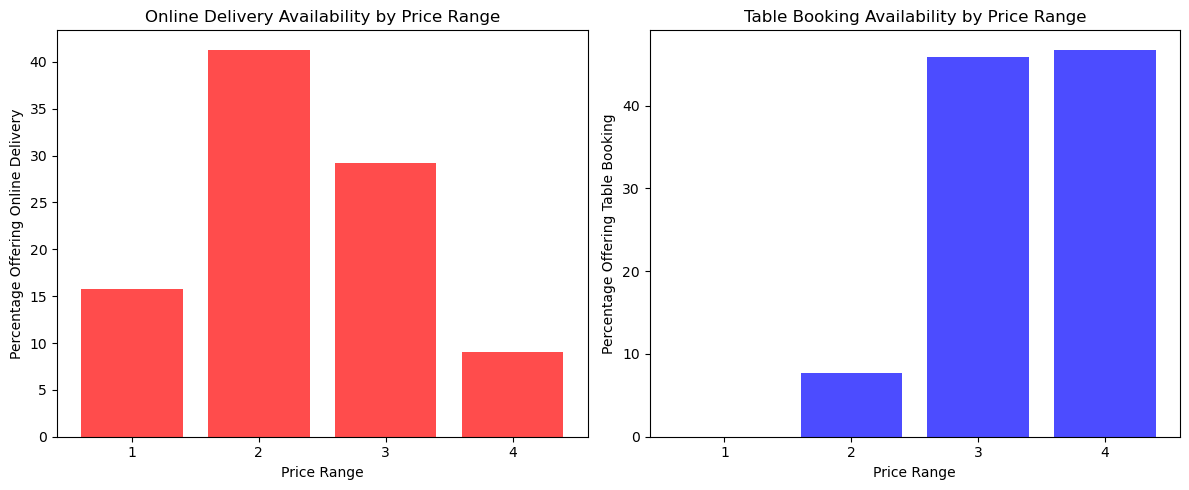

Conclusion:
1.) Affordable restaurants (Price Range 1 & 2) focus more on online delivery than table booking.
2.) Premium restaurants (Price Range 3 & 4) prioritize table bookings over online delivery.
3.) Mid-range restaurants (Price Range 2) strike a balance, offering both services.


In [12]:

# Calculate the percentage of restaurants offering Online Delivery in each Price Range
online_delivery_percentage = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack() * 100

# Calculate the percentage of restaurants offering Table Booking in each Price Range
table_booking_percentage = df.groupby("Price range")["Has Table booking"].value_counts(normalize=True).unstack() * 100

# Extract the percentage of restaurants that offer each service (Yes = 1)
online_delivery_percentage_yes = online_delivery_percentage.get(1, pd.Series())  # Handle cases where 1 may be missing
table_booking_percentage_yes = table_booking_percentage.get(1, pd.Series())
#online_delivery_percentage_yes = pd.DataFrame(online_delivery_percentage_yes)
#table_booking_percentage_yes = pd.DataFrame(table_booking_percentage_yes )
# Show results
print("Online Delivery Percentage")
print(online_delivery_percentage_yes)
print("\nTable Booking Percentage")
print(table_booking_percentage_yes)

# Create bar plots for Online Delivery and Table Booking availability
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Online Delivery Plot
ax[0].bar(online_delivery_percentage_yes.index, online_delivery_percentage_yes.values, color="red", alpha=0.7)
ax[0].set_title("Online Delivery Availability by Price Range")
ax[0].set_xlabel("Price Range")
ax[0].set_ylabel("Percentage Offering Online Delivery")
ax[0].set_xticks(online_delivery_percentage_yes.index)

# Table Booking Plot
ax[1].bar(table_booking_percentage_yes.index, table_booking_percentage_yes.values, color="blue", alpha=0.7)
ax[1].set_title("Table Booking Availability by Price Range")
ax[1].set_xlabel("Price Range")
ax[1].set_ylabel("Percentage Offering Table Booking")
ax[1].set_xticks(table_booking_percentage_yes.index)

# Show plot
plt.tight_layout()
plt.show()


print ("=======================================================")
#Explaining the relationship 
print("Conclusion:")
print("1.) Affordable restaurants (Price Range 1 & 2) focus more on online delivery than table booking.")
print("2.) Premium restaurants (Price Range 3 & 4) prioritize table bookings over online delivery.")
print("3.) Mid-range restaurants (Price Range 2) strike a balance, offering both services.")


# 3b).   Determine if higher-priced restaurants are more likely to offer these services.

The resulting matrix shows how strongly two variables are linearly related:
1.) A value close to 1 indicates a strong positive correlation.
2.) A value close to -1 indicates a strong negative correlation.
3.) A value around 0 suggests little or no linear relationship.


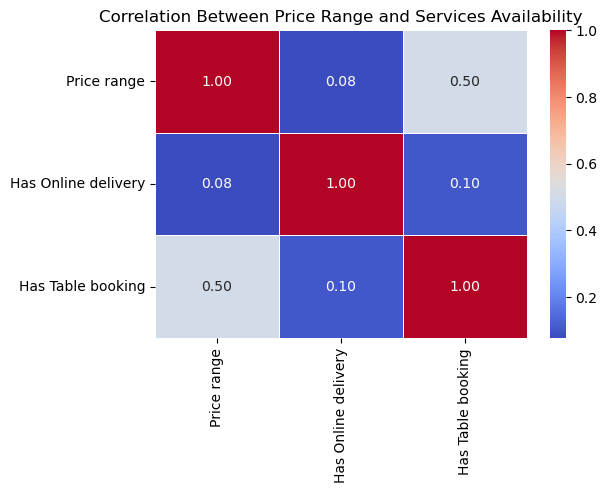

,Price range,Has Online delivery,Has Table booking
Price range,1.000000,0.077887,0.502166
Has Online delivery,0.077887,1.000000,0.101041
Has Table booking,0.502166,0.101041,1.000000


In [11]:
# Convert relevant columns to numeric/binary values
df["Has Online delivery"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})
df["Has Table booking"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
df["Price range"] = pd.to_numeric(df["Price range"], errors="coerce")

# Calculate correlation between price range and service availability
correlation_analysis = df[["Price range", "Has Online delivery", "Has Table booking"]]
correlation_analysis = correlation_analysis.corr()
#Explaining how the pearson correlation works
print('The resulting matrix shows how strongly two variables are linearly related:')
print('1.) A value close to 1 indicates a strong positive correlation.')
print('2.) A value close to -1 indicates a strong negative correlation.')
print('3.) A value around 0 suggests little or no linear relationship.')



# Plot heatmap to visualize correlations
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_analysis, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Price Range and Services Availability")
plt.show()

# Display correlation values
correlation_analysis

